# Classification des avis sur des vêtements de femmes vendus dans le e-commerce

L'essor du commerce en ligne dans l'industrie de la mode a provoqué la création de nombreux avis clients. Ce projet vise à appliquer des méthodes de traitement automatique du langage pour **classifier** les avis sur les vêtements féminins vendus dans le e-commerce.

L'objectif de notre étude est de classifier les avis en positif, neutre et négatifs pour comprendre les tendances et la satisfaction des clients dans l'objectif.

Nous avons été attirés par cette thématique en raison de l'essor croissant du commerce en ligne. De plus, l'opportunité de manipuler des données réelles issues d'un domaine qui nous touche directement, même si ces données sont anonymisées, a suscité un intérêt chez nous.

In [144]:
import pandas as pd
import spacy
import string
from nltk.tokenize import RegexpTokenizer
from nltk.stem import SnowballStemmer

In [145]:
pd.set_option('display.max_colwidth', None)

## I. Import des données

Dans un premier temps, nous allons importer nos données. Notre base de données contient des informations sur des avis de vêtements femmes vendus sur internet. Ces données sont issus d'un processus de webscrapping.

In [146]:
# Import des données
data = pd.read_csv("Womens Clothing E-Commerce Reviews.csv", sep = ",")

# Renomage première colonne pour pouvoir l'utiliser comme id par la suite
data = data.rename(columns = {"Unnamed: 0" : "id"})

# Affichage des 5 premières lignes
data.head()

,id,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses


In [250]:
# Nombre de lignes 
print("Nombre de lignes : ", data.shape[0])
# Nombre de colonnes
print("Nombre de variables : ", data.shape[1])

Nombre de lignes :  23486
Nombre de variables :  14


Notre jeu de données contient 23 486 avis et 11 colonnes. 

## II. Pré-traitement des données

### II.1. Nettoyage des données

Pour avoir des données plus propres, nous allons nettoyer notre base de données en :
- mettant le texte en minuscules
- supprimant la ponctuation
- supprimant les caractères spéciaux

D'abord, nous allons convertir notre colonne 'Review Text' en chaîne de caractères pour pouvoir utiliser toutes les fonctions de pré-traitements.

In [148]:
data['Review Text'] = data['Review Text'].astype(str)
data['Review Text'].dtype

dtype('O')

Dans un premier temps, nous allons mettre notre texte en minuscules.

In [149]:
def lower_text(df, column_name): # Convertit en minuscules
    df[column_name] = df[column_name].apply(lambda x: x.lower())
    return df

data = lower_text(data, 'Review Text')
data.head()

,id,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,"love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,"i had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"i love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,this shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses


Ensuite, nous allons supprimer toute la ponctuation.

In [150]:
# Pour installer spacy et le modèle anglais
!pip install -U spacy
! python -m spacy validate

import spacy
!python -m spacy download en_core_web_sm

nlp = spacy.load('en_core_web_sm')


⠙ Loading compatibility table...
⠹ Loading compatibility table...
⠸ Loading compatibility table...
⠼ Loading compatibility table...
✔ Loaded compatibility table

================= Installed pipeline packages (spaCy v3.7.2) =================
ℹ spaCy installation:
c:\Users\ASUS\anaconda3\Lib\site-packages\spacy

NAME              SPACY            VERSION                            
en_core_web_sm    >=3.7.2,<3.8.0   3.7.1   ✔
fr_core_news_sm   >=3.7.0,<3.8.0   3.7.0   ✔

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 330.3 kB/s eta 0:00:39
     --------------------------------------- 0.1/12.8 MB 770.8 kB/s eta 0:00:17
     - -------------------------------------- 0.4/12.8 MB 2.5 MB/s eta 0:00:06
     - -------------------------------------- 0.6/12.8 MB 3.2 MB/s eta 0:00:04
     -- ------------------------------------- 0.8/12.8 MB 3.6 MB/s eta 0:00:04
     --- ------------------------------------ 1.1/12.8 M

In [151]:
# Suppression de la ponctuation
def remove_punctuation(df, column_name):
    df[column_name] = df[column_name].apply(lambda x: ' '.join([token.text for token in nlp(x) if not token.is_punct and token.text != "'"]))
    return df

In [152]:
# def remove_punctuation(df, column_name):
#     df[column_name] = df[column_name].apply(lambda x: ' '.join([token.text for token in nlp(x) if not token.is_punct and token.text != "'" and token.text != "’"]))
#     return df

In [153]:
data = remove_punctuation(data, 'Review Text')

On affiche notre dataframe pour vérifier que le pré-traitement soit bien réalisé.

In [154]:
data.head()

,id,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,absolutely wonderful silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,love this dress it 's sooo pretty i happened to find it in a store and i 'm glad i did bc i never would have ordered it online bc it 's petite i bought a petite and am 5'8 i love the length on me- hits just a little below the knee would definitely be a true midi on someone who is truly petite,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,i had such high hopes for this dress and really wanted it to work for me i initially ordered the petite small my usual size but i found this to be outrageously small so small in fact that i could not zip it up i reordered it in petite medium which was just ok overall the top half was comfortable and fit nicely but the bottom half had a very tight under layer and several somewhat cheap net over layers imo a major design flaw was the net over layer sewn directly into the zipper it c,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,i love love love this jumpsuit it 's fun flirty and fabulous every time i wear it i get nothing but great compliments,5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,this shirt is very flattering to all due to the adjustable front tie it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan love this shirt,5,1,6,General,Tops,Blouses


### II.2. Représentations graphiques

Nous allons procéder à quelques représentations graphiques et résumés pour décrire notre jeu de données globalement pour avoir une idée de ce que nous devons analyser par la suite.

In [247]:
# Describe permet d'avoir un aperçu des variables quantitatives
data.describe()

,id,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


L'age moyen des clientes est de 43 ans.

<Axes: title={'center': 'Age'}, xlabel='Department Name'>

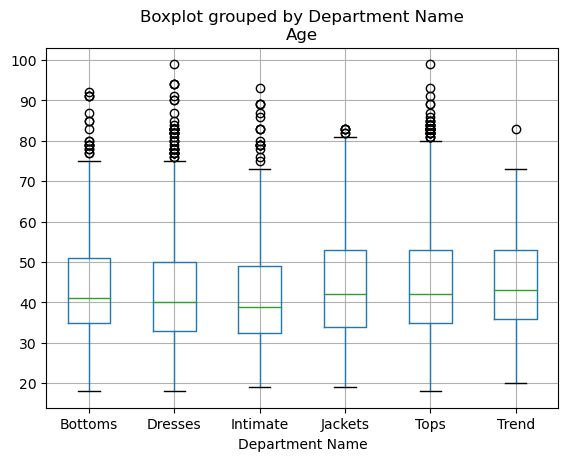

In [248]:
# Boxplot age par departement
data.boxplot(column = "Age", by = "Department Name")

In [251]:
# Note moyenne par departement
data.groupby("Department Name")["Rating"].mean()

Department Name
Bottoms     4.288760
Dresses     4.150815
Intimate    4.280115
Jackets     4.264535
Tops        4.172239
Trend       3.815126
Name: Rating, dtype: float64

Afin d'analyser les différents produits dans les catégories, nous avons grouper les informations : 

In [252]:
data.groupby("Department Name")["Class Name"].unique()

Department Name
Bottoms                    [Pants, Skirts, Jeans, Shorts, Casual bottoms]
Dresses                                                         [Dresses]
Intimate    [Intimates, Lounge, Sleep, Swim, Legwear, Layering, Chemises]
Jackets                                              [Outerwear, Jackets]
Tops                               [Blouses, Knits, Sweaters, Fine gauge]
Trend                                                             [Trend]
Name: Class Name, dtype: object

Dans la catégorie des bas, on peut retrouver les pantalons, les jupes, les jeans, shorts et pantalons plutôt casuals. 

### II.3. Sélection de descripteurs : prétraitements textuels

Pour effectuer nos tâches de traitements de langage, nous allons utiliser spacy. En effet, spacy a plusieurs fonctionnalités : 
- permet de tokeniser directement notre texte
- peut lemmatiser les mots
- identifier et classer les entités nommées
- analyser les dépendances syntaxiques entre les mots
- représenter les mots sous forme de vecteurs (embedding)
- etc

#### II.3.1. Représentation des textes

##### II.3.1.1. Lemmatisation

**Exemple sur un avis**

Nous allons d'abord afficher le contenu d'un avis pour voir à quoi ressemble nos données

In [155]:
avis50 = data['Review Text'].iloc[50]
avis50

"this is a cute top that can transition easily from summer to fall it fits well nice print and it 's comfortable i tried this on in the store but did not purchase it because the color washed me out this is not the best color for a blonde would look much better on a brunette if this was in a different color i most likely would have purchased it"

On le transforme en objet spacy pour pouvoir faire des  pré-traitements textuels dessus.

In [156]:
avis_nlp = nlp(avis50)

In [157]:
type(avis_nlp)

spacy.tokens.doc.Doc

On a bien un objet spacy à présent.

On affiche chaque token de notre objet spacy.

In [158]:
for token in avis_nlp:
    print(token)

this
is
a
cute
top
that
can
transition
easily
from
summer
to
fall
it
fits
well
nice
print
and
it
's
comfortable
i
tried
this
on
in
the
store
but
did
not
purchase
it
because
the
color
washed
me
out
this
is
not
the
best
color
for
a
blonde
would
look
much
better
on
a
brunette
if
this
was
in
a
different
color
i
most
likely
would
have
purchased
it


Ensuite, nous allons pouvoir afficher les lemmes de chaque token. Grâce à cette étape, nous allons pouvoir simplifier les mots pour faciliter notre analyse textuelle.

In [159]:
# Lemmatisation
for token in avis_nlp:
    print(token.lemma_)

this
be
a
cute
top
that
can
transition
easily
from
summer
to
fall
it
fit
well
nice
print
and
it
be
comfortable
I
try
this
on
in
the
store
but
do
not
purchase
it
because
the
color
wash
I
out
this
be
not
the
good
color
for
a
blonde
would
look
much
well
on
a
brunette
if
this
be
in
a
different
color
I
most
likely
would
have
purchase
it


**Généralisation**

Nous allons pouvoir réaliser ces prétraitements sur l'ensemble de notre colonne 'Review Text'

Pour lemmatiser notre texte, nous allons définir une fonction. Cette étape est indispensable pour récupérer les lemmes des mots de notre texte d'origine. Nous allons simplifier notre texte grâce à cette fonction.

In [160]:
def lemmatise_text(text):
    text = nlp(text) # on transforme les avis en objets spacy
    lemmas = [token.lemma_ for token in text] # on récupère les lemmes
    return ' '.join(lemmas) # on retourne les lemmes sous forme de texte

In [161]:
# On teste sur 1 avis 
print("Avis initial : ", data['Review Text'].iloc[50])
print("Avis lemmatisé : ", lemmatise_text(data['Review Text'].iloc[50]))


Avis initial :  this is a cute top that can transition easily from summer to fall it fits well nice print and it 's comfortable i tried this on in the store but did not purchase it because the color washed me out this is not the best color for a blonde would look much better on a brunette if this was in a different color i most likely would have purchased it
Avis lemmatisé :  this be a cute top that can transition easily from summer to fall it fit well nice print and it be comfortable I try this on in the store but do not purchase it because the color wash I out this be not the good color for a blonde would look much well on a brunette if this be in a different color I most likely would have purchase it


Nous allons ensuite ajouter une colonne avec la fonction de **lemmatisation** appliquée à nos avis.

In [162]:
data['lemmas'] = data['Review Text'].apply(lemmatise_text)

In [163]:
data.head()

,id,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,lemmas
0,0,767,33,NaN,absolutely wonderful silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates,absolutely wonderful silky and sexy and comfortable
1,1,1080,34,NaN,love this dress it 's sooo pretty i happened to find it in a store and i 'm glad i did bc i never would have ordered it online bc it 's petite i bought a petite and am 5'8 i love the length on me- hits just a little below the knee would definitely be a true midi on someone who is truly petite,5,1,4,General,Dresses,Dresses,love this dress it be sooo pretty I happen to find it in a store and I ' m glad I do bc I never would have order it online bc it be petite I buy a petite and be 5'8 I love the length on me- hit just a little below the knee would definitely be a true midi on someone who be truly petite
2,2,1077,60,Some major design flaws,i had such high hopes for this dress and really wanted it to work for me i initially ordered the petite small my usual size but i found this to be outrageously small so small in fact that i could not zip it up i reordered it in petite medium which was just ok overall the top half was comfortable and fit nicely but the bottom half had a very tight under layer and several somewhat cheap net over layers imo a major design flaw was the net over layer sewn directly into the zipper it c,3,0,0,General,Dresses,Dresses,I have such high hope for this dress and really want it to work for I I initially order the petite small my usual size but I find this to be outrageously small so small in fact that I could not zip it up I reorder it in petite medium which be just ok overall the top half be comfortable and fit nicely but the bottom half have a very tight under layer and several somewhat cheap net over layer imo a major design flaw be the net over layer sew directly into the zipper it c
3,3,1049,50,My favorite buy!,i love love love this jumpsuit it 's fun flirty and fabulous every time i wear it i get nothing but great compliments,5,1,0,General Petite,Bottoms,Pants,I love love love this jumpsuit it be fun flirty and fabulous every time I wear it I get nothing but great compliment
4,4,847,47,Flattering shirt,this shirt is very flattering to all due to the adjustable front tie it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan love this shirt,5,1,6,General,Tops,Blouses,this shirt be very flattering to all due to the adjustable front tie it be the perfect length to wear with legging and it be sleeveless so it pair well with any cardigan love this shirt


In [164]:
# Sauvegarde des données
data.to_pickle('data.pkl')

##### II.3.1.2. Racines

Pour réduire les mots à leur forme de base, nous allons utiliser **SnowballStemmer** sur notre texte. Pour cela, nous allons créer une fonction et l'appliquer à nos avis. 

In [165]:
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

In [166]:
def stem_text(text):
    stemmer = SnowballStemmer('english')
    tokenizer = RegexpTokenizer('\w+')
    stems = [stemmer.stem(token) for token in tokenizer.tokenize(text)]
    return ' '.join(stems)

On applique la fonction à notre dataframe.

In [167]:
data['stems'] = data['Review Text'].apply(stem_text)

On vérifie que la forme soit correcte.

In [168]:
data.head()

,id,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,lemmas,stems
0,0,767,33,NaN,absolutely wonderful silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates,absolutely wonderful silky and sexy and comfortable,absolut wonder silki and sexi and comfort
1,1,1080,34,NaN,love this dress it 's sooo pretty i happened to find it in a store and i 'm glad i did bc i never would have ordered it online bc it 's petite i bought a petite and am 5'8 i love the length on me- hits just a little below the knee would definitely be a true midi on someone who is truly petite,5,1,4,General,Dresses,Dresses,love this dress it be sooo pretty I happen to find it in a store and I ' m glad I do bc I never would have order it online bc it be petite I buy a petite and be 5'8 I love the length on me- hit just a little below the knee would definitely be a true midi on someone who be truly petite,love this dress it s sooo pretti i happen to find it in a store and i m glad i did bc i never would have order it onlin bc it s petit i bought a petit and am 5 8 i love the length on me hit just a littl below the knee would definit be a true midi on someon who is truli petit
2,2,1077,60,Some major design flaws,i had such high hopes for this dress and really wanted it to work for me i initially ordered the petite small my usual size but i found this to be outrageously small so small in fact that i could not zip it up i reordered it in petite medium which was just ok overall the top half was comfortable and fit nicely but the bottom half had a very tight under layer and several somewhat cheap net over layers imo a major design flaw was the net over layer sewn directly into the zipper it c,3,0,0,General,Dresses,Dresses,I have such high hope for this dress and really want it to work for I I initially order the petite small my usual size but I find this to be outrageously small so small in fact that I could not zip it up I reorder it in petite medium which be just ok overall the top half be comfortable and fit nicely but the bottom half have a very tight under layer and several somewhat cheap net over layer imo a major design flaw be the net over layer sew directly into the zipper it c,i had such high hope for this dress and realli want it to work for me i initi order the petit small my usual size but i found this to be outrag small so small in fact that i could not zip it up i reorder it in petit medium which was just ok overal the top half was comfort and fit nice but the bottom half had a veri tight under layer and sever somewhat cheap net over layer imo a major design flaw was the net over layer sewn direct into the zipper it c
3,3,1049,50,My favorite buy!,i love love love this jumpsuit it 's fun flirty and fabulous every time i wear it i get nothing but great compliments,5,1,0,General Petite,Bottoms,Pants,I love love love this jumpsuit it be fun flirty and fabulous every time I wear it I get nothing but great compliment,i love love love this jumpsuit it s fun flirti and fabul everi time i wear it i get noth but great compliment
4,4,847,47,Flattering shirt,this shirt is very flattering to all due to the adjustable front tie it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan love this shirt,5,1,6,General,Tops,Blouses,this shirt be very flattering to all due to the adjustable front tie it be the perfect length to wear with legging and it be sleeveless so it pair well with any cardigan love this shirt,this shirt is veri flatter to all due to the adjust front tie it is the perfect length to wear with leg and it is sleeveless so it pair well with ani cardigan love this shirt


In [169]:
# Sauvegarde des données
data.to_pickle('data.pkl')

##### II.3.1.3. Etiquettes morpho-syntaxiques

Puis, nous allons analyser notre texte et renvoyer chaque mot remplacé par sa catégorie grammaticale pour continuer l'étude des avis.

In [170]:
def replace_words_with_pos_tag(text):
    text = nlp(text)
    return ' '.join([token.pos_ for token in text])

In [171]:
data['pos'] = data['Review Text'].apply(replace_words_with_pos_tag)

In [172]:
data.head()

,id,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,lemmas,stems,pos
0,0,767,33,NaN,absolutely wonderful silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates,absolutely wonderful silky and sexy and comfortable,absolut wonder silki and sexi and comfort,ADV ADJ NOUN CCONJ ADJ CCONJ ADJ
1,1,1080,34,NaN,love this dress it 's sooo pretty i happened to find it in a store and i 'm glad i did bc i never would have ordered it online bc it 's petite i bought a petite and am 5'8 i love the length on me- hits just a little below the knee would definitely be a true midi on someone who is truly petite,5,1,4,General,Dresses,Dresses,love this dress it be sooo pretty I happen to find it in a store and I ' m glad I do bc I never would have order it online bc it be petite I buy a petite and be 5'8 I love the length on me- hit just a little below the knee would definitely be a true midi on someone who be truly petite,love this dress it s sooo pretti i happen to find it in a store and i m glad i did bc i never would have order it onlin bc it s petit i bought a petit and am 5 8 i love the length on me hit just a littl below the knee would definit be a true midi on someon who is truli petit,VERB DET NOUN SPACE PRON AUX NOUN ADJ SPACE PRON VERB PART VERB PRON ADP DET NOUN CCONJ PRON VERB VERB ADJ PRON VERB PROPN PRON ADV AUX AUX VERB PRON ADJ PROPN PRON AUX ADJ SPACE PRON VERB DET ADJ CCONJ AUX NUM SPACE PRON VERB DET NOUN ADP PROPN VERB ADV DET ADJ ADP DET NOUN SPACE AUX ADV AUX DET ADJ NOUN ADP PRON PRON AUX ADV ADJ
2,2,1077,60,Some major design flaws,i had such high hopes for this dress and really wanted it to work for me i initially ordered the petite small my usual size but i found this to be outrageously small so small in fact that i could not zip it up i reordered it in petite medium which was just ok overall the top half was comfortable and fit nicely but the bottom half had a very tight under layer and several somewhat cheap net over layers imo a major design flaw was the net over layer sewn directly into the zipper it c,3,0,0,General,Dresses,Dresses,I have such high hope for this dress and really want it to work for I I initially order the petite small my usual size but I find this to be outrageously small so small in fact that I could not zip it up I reorder it in petite medium which be just ok overall the top half be comfortable and fit nicely but the bottom half have a very tight under layer and several somewhat cheap net over layer imo a major design flaw be the net over layer sew directly into the zipper it c,i had such high hope for this dress and realli want it to work for me i initi order the petit small my usual size but i found this to be outrag small so small in fact that i could not zip it up i reorder it in petit medium which was just ok overal the top half was comfort and fit nice but the bottom half had a veri tight under layer and sever somewhat cheap net over layer imo a major design flaw was the net over layer sewn direct into the zipper it c,PRON VERB ADJ ADJ NOUN ADP DET NOUN CCONJ ADV VERB PRON PART VERB ADP PRON PRON ADV VERB DET ADJ ADJ PRON ADJ NOUN CCONJ PRON VERB PRON PART AUX ADV ADJ ADV ADJ ADP NOUN SCONJ PRON AUX PART VERB PRON ADP PRON VERB PRON ADP ADJ NOUN PRON AUX ADV ADV ADJ DET ADJ NOUN AUX ADJ CCONJ ADJ ADV CCONJ DET ADJ NOUN VERB DET ADV ADJ ADP NOUN CCONJ ADJ ADV ADJ NOUN ADP NOUN ADV DET ADJ NOUN NOUN AUX DET NOUN ADP NOUN VERB ADV ADP DET NOUN PRON VERB
3,3,1049,50,My favorite buy!,i love love love this jumpsuit it 's fun flirty and fabulous every time i wear it i get nothing but great compliments,5,1,0,General Petite,Bottoms,Pants,I love love love this jumpsuit it be fun flirty and fabulous every time I wear it I get nothing but great compliment,i love love love this jumpsuit it s fun flirti and fabul everi time i wear it i get noth but great compliment,PRON VERB NOUN VERB DET NOUN PRON AUX NOUN NOUN CCONJ ADJ DET 

In [173]:
# Sauvegarde des données
data.to_pickle('data.pkl')

##### II.3.1.4. Entités nommées

Dans notre contexte l'étude d'entités nommées n'a pas beaucoup de sens car on ne retrouve pas beaucoup de lieux, dates ou personnalités dans des avis concernant des vêtements pour femmes.

Pour prouver cet argument, nous allons tester sur un avis.

In [174]:
def ner(text):

    text = nlp(text) # on transforme le texte en objet spacy
    
    new_text = [] # on crée une liste vide

    for token in text: # pour chaque token dans l'avis

        # print(token.text, token.ent_iob_, token.ent_type_)
        
        if token.ent_iob_ == "O": # si l'entité ne fait pas partie d'une entité nommée
            new_text.append(token.text) # on ajoute le texte du token à la liste
        elif token.ent_iob_ == "B": # si l'entité fait partie d'une entité nommée
            new_text.append(token.ent_type_) # on ajoute le type de l'entité à la liste

        # Si l'entité comprend plusieurs mot on ne répète pas l'étiquette
        else:
            continue
    return ' '.join(new_text) # on retourne les étiquettes sous forme de texte

In [175]:
# Test sur un avis
print("Avis initial : ", data['Review Text'].iloc[50])
print("Avis avec les étiquettes : ", ner(data['Review Text'].iloc[50]))

Avis initial :  this is a cute top that can transition easily from summer to fall it fits well nice print and it 's comfortable i tried this on in the store but did not purchase it because the color washed me out this is not the best color for a blonde would look much better on a brunette if this was in a different color i most likely would have purchased it
Avis avec les étiquettes :  this is a cute top that can transition easily from DATE to fall it fits well nice print and it 's comfortable i tried this on in the store but did not purchase it because the color washed me out this is not the best color for a blonde would look much better on a brunette if this was in a different color i most likely would have purchased it


Dans cet avis, nous pouvons retrouver une entité nommée DATE correspondant à la période de l'année où le vêtement semble être le plus adapté. Cependant, cette dimension ne nous aidera pas dans notre objectif de classification (positif / négatif).

## III. Classification

Dans cette partie, nous allons chercher à classifier les avis en fonction de leur note. 

Nous allons utiliser la colonne "Rating" comme étiquettes et "Review Text" comme valeurs. 

### III.1. Sélection des informations dans notre dataframe

Nous allons sélectionner les trois colonnes qui vont nous servir pour la classification dans un objectif d'optimiser les temps de calculs et de ne pas avoir d'informations superflus.
Nous avons choisi de travailler sur la colonne 'lemmas' et non pas 'Review Text' car celle-ci est plus générale et nous permettra d'avoir un modèle plus fiable selon nous.

In [176]:
# On récupère la colonne id, Rating et lemmas
new_data = data[["id", "Rating", "lemmas"]]
new_data.head()

,id,Rating,lemmas
0,0,4,absolutely wonderful silky and sexy and comfortable
1,1,5,love this dress it be sooo pretty I happen to find it in a store and I ' m glad I do bc I never would have order it online bc it be petite I buy a petite and be 5'8 I love the length on me- hit just a little below the knee would definitely be a true midi on someone who be truly petite
2,2,3,I have such high hope for this dress and really want it to work for I I initially order the petite small my usual size but I find this to be outrageously small so small in fact that I could not zip it up I reorder it in petite medium which be just ok overall the top half be comfortable and fit nicely but the bottom half have a very tight under layer and several somewhat cheap net over layer imo a major design flaw be the net over layer sew directly into the zipper it c
3,3,5,I love love love this jumpsuit it be fun flirty and fabulous every time I wear it I get nothing but great compliment
4,4,5,this shirt be very flattering to all due to the adjustable front tie it be the perfect length to wear with legging and it be sleeveless so it pair well with any cardigan love this shirt


#### III.1.1 Suppression des valeurs manquantes

Pour analyser seulement les données complètes, nous allons d'abord supprimer toutes les valeurs manquantes de notre jeu de données réduit. 

In [177]:
new_data = new_data.dropna() # On supprime les lignes avec des valeurs manquantes

In [178]:
data.shape, new_data.shape

((23486, 14), (23486, 3))

Cette manipulation nous montre qu'il n'y a pas de valeur manquante dans les données nous intéressant pour nous étude. Nous pouvons donc poursuivre sans problème.

#### III.1.2. Analyse de la colonne "Rating"

Nous allons d'abord analyser la colonne Rating qui correspond à notre variable à expliquer.

In [179]:
# Analyse de la colonne "Rating"
new_data["Rating"].value_counts()

Rating
5    13131
4     5077
3     2871
2     1565
1      842
Name: count, dtype: int64

Nous avons ici des notes allant de 1 à 5. Nous allons diviser ces valeurs en 3 catégories : 
- -1 pour les notes allant de 1 à 2
- 0 pour les notes égales à 3 
- 1 pour les plus élevées (4 et 5)

#### III.1.3. Analyse de la colonne 'lemmas'

Notre colonne correspondant aux valeurs est "lemmas". \
Cette colonne contient tous les avis laissés par les internautes sur les différents vêtements et se trouve sous forme de chaînes de caractères. Nous avons choisi cette colonne et non pas "Review Text" pour être le plus général possible.

#### III.1.4. Changement des étiquettes

Pour réaliser notre classification, nous allons donc modifier les étiquettes comme précisé ci-dessus. 

In [180]:
def map_label_to_numeric(label):
    return 1 if label == 5 else 0 if label == 3 or label == 4 else -1

In [181]:
def get_labels(data):
    labels = data[["id","Rating"]]
    labels['Rating'] = labels['Rating'].apply(map_label_to_numeric)
    labels.set_index('id', inplace=True)
    
    # ajouter les labels dans data selon l'id
    data['score_avis'] = labels

    # data['score_avis'] = labels
    return data

In [182]:
new_data = get_labels(new_data)
new_data.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4580\29256686.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels['Rating'] = labels['Rating'].apply(map_label_to_numeric)


,id,Rating,lemmas,score_avis
0,0,4,absolutely wonderful silky and sexy and comfortable,0
1,1,5,love this dress it be sooo pretty I happen to find it in a store and I ' m glad I do bc I never would have order it online bc it be petite I buy a petite and be 5'8 I love the length on me- hit just a little below the knee would definitely be a true midi on someone who be truly petite,1
2,2,3,I have such high hope for this dress and really want it to work for I I initially order the petite small my usual size but I find this to be outrageously small so small in fact that I could not zip it up I reorder it in petite medium which be just ok overall the top half be comfortable and fit nicely but the bottom half have a very tight under layer and several somewhat cheap net over layer imo a major design flaw be the net over layer sew directly into the zipper it c,0
3,3,5,I love love love this jumpsuit it be fun flirty and fabulous every time I wear it I get nothing but great compliment,1
4,4,5,this shirt be very flattering to all due to the adjustable front tie it be the perfect length to wear with legging and it be sleeveless so it pair well with any cardigan love this shirt,1


A présent, nous n'avons plus besoin de la colonne Rating car nous avons créer la colonne score_avis. Nous pouvons donc supprimer du dataframe cette colonne.

In [184]:
new_data = new_data[["id", "lemmas", "score_avis"]]
new_data.head()

,id,lemmas,score_avis
0,0,absolutely wonderful silky and sexy and comfortable,0
1,1,love this dress it be sooo pretty I happen to find it in a store and I ' m glad I do bc I never would have order it online bc it be petite I buy a petite and be 5'8 I love the length on me- hit just a little below the knee would definitely be a true midi on someone who be truly petite,1
2,2,I have such high hope for this dress and really want it to work for I I initially order the petite small my usual size but I find this to be outrageously small so small in fact that I could not zip it up I reorder it in petite medium which be just ok overall the top half be comfortable and fit nicely but the bottom half have a very tight under layer and several somewhat cheap net over layer imo a major design flaw be the net over layer sew directly into the zipper it c,0
3,3,I love love love this jumpsuit it be fun flirty and fabulous every time I wear it I get nothing but great compliment,1
4,4,this shirt be very flattering to all due to the adjustable front tie it be the perfect length to wear with legging and it be sleeveless so it pair well with any cardigan love this shirt,1


#### III.1.5. Division de notre dataframe

Pour réaliser notre classification, nous avons besoin de séparer notre jeu de données en un jeu d'apprentissage, de validation et de test.

Note :
Les données en apprentissage automatique sont généralement séparées en trois jeux :
+ **entraînement** : données destinées à l'apprentissage du modèle ;
+ **validation** : données destinées à une évaluation intermédiaire du modèle pour permettre l'ajustement de ses hyperparamètres. Une fois les hyperparamètres du modèle arrêtés, on peut le ré-entraîner sur l'ensemble des données (entraînement + validation) avant de le tester sur le jeu de test ;
+ **test** : données destinées EXCLUSIVEMENT à l'évaluation FINALE (à réaliser une fois uniquement !) du modèle choisi finalement. Elles ne doivent sous aucune forme servir à la conception du modèle. Il est donc interdit aussi bien de les examiner que d'évaluer le modèle en cours de développement sur ce jeu de données.

Pour créer l'ensemble de validation, nous allons effectuer la manipulation à la fin du pré-traitement réalisé lors de la classification. 

In [185]:
# Fonction pour diviser de notre jeu de données en 2 : train et test
def split_data(data, train_ratio):
    data_train = data.sample(frac = train_ratio)
    data_test = data.drop(data_train.index)
    return data_train, data_test

# Diviser notre jeu de données en 2 : train et test
data_train, data_test = split_data(new_data, 0.6)

In [186]:
data_train.shape, data_test.shape

((14092, 3), (9394, 3))

Dans notre cas :
+ entraînement (appelé *Train*) contenant 14 092 observations, soit environ 60% du jeu de données initial ;
+ test (appelé *Test*), contenant 9 394 observations.

In [187]:
data_train.head()

,id,lemmas,score_avis
6300,6300,very pretty top however you absolutely need to try it on before order fit well in the chest area but way too big in the side I look pregnant have to return,0
2374,2374,the fabric be too sheer also look like sleepwear just not my thing,-1
988,988,this jacket be worth every penny it be light enough to wear when like 55/60 out or good when it be in the 40 with a sweater underneath the fit and design of the coat be amazing I love the full collar look that be my favorite detail of the jacket love the green so much I buy the coral too I normally wear a 12/14 in clothe and the large be perfect,1
9405,9405,this be my second pair of these because they fit and fall so good pricey but worth it,0
22569,22569,this dress be really beautiful in person it come with a spaghetti strap clingy cotton slip underneath it run at least 2 size large I try my usual size 6 and need to go down to a zero,1


In [188]:
data_test.head()

,id,lemmas,score_avis
0,0,absolutely wonderful silky and sexy and comfortable,0
1,1,love this dress it be sooo pretty I happen to find it in a store and I ' m glad I do bc I never would have order it online bc it be petite I buy a petite and be 5'8 I love the length on me- hit just a little below the knee would definitely be a true midi on someone who be truly petite,1
2,2,I have such high hope for this dress and really want it to work for I I initially order the petite small my usual size but I find this to be outrageously small so small in fact that I could not zip it up I reorder it in petite medium which be just ok overall the top half be comfortable and fit nicely but the bottom half have a very tight under layer and several somewhat cheap net over layer imo a major design flaw be the net over layer sew directly into the zipper it c,0
5,5,I love tracy reese dress but this one be not for the very petite I be just under 5 foot tall and usually wear a 0p in this brand this dress be very pretty out of the package but its a lot of dress the skirt be long and very full so it overwhelm my small frame not a stranger to alteration shorten and narrow the skirt would take away from the embellishment of the garment I love the color and the idea of the style but it just do not work on I I return this dress,-1
6,6,I ade this in my basket at hte last mintue to see what it would look like in person store pick up I go with teh darkler color only because I be so pale hte color be really gorgeous and turn out it mathce everythiing I be try on with it prefectly it be a little baggy on I and hte xs be hte msallet size bummer no petite I decide to jkeep it though because as I say it matvehd everything my ejans pant and the 3 skirt I waas try on of which I keep all oop,1


## IV. Exploration des données

#### IV.1. Distribution des classes

Il est important de connaître la répartition des classes dans les données d'entraînement pour pouvoir procéder à notre classification.

In [189]:
from collections import Counter
import pandas as pd

class_distribution = (pd.DataFrame.from_dict(Counter(data_train.score_avis.values),
                                             orient='index')
                                  .rename(columns={0: 'num_examples'}))
class_distribution.index.name = 'class'
class_distribution

,num_examples
class,
0,4782
-1,1450
1,7860


In [190]:
import numpy as np

class_distribution['perc_examples'] = np.around(class_distribution.num_examples /
                                                np.sum(class_distribution.num_examples),
                                                2)
class_distribution

,num_examples,perc_examples
class,,
0,4782,0.34
-1,1450,0.10
1,7860,0.56


Nous pouvons observer que les classes de scores sont réparties de manière aléatoire dans notre jeu d'apprentissage. Nous pouvons noter plus de 50% d'avis très favorables, correspondant à la note de 5/5. Les avis négatifs sont en minorité dans notre jeu d'entraînement.

Ces tableaux nous montre que nous avons une prédominance pour les avis positifs dans notre jeu de données (note de 5) et les notes faibles sont minoritaires, elles ne concernent que 10% de notre jeu de données d'entrainement.

#### IV.2. Exploration du texte

Pour se faire une idée des textes auxquels nous avons affaire, nous allons les afficher pour savoir quels pré-traitements sont nécessaires.

In [191]:
# Affichage des 5 premiers avis
data_train["lemmas"].values[:5]

array(['very pretty top however you absolutely need to try it on before order fit well in the chest area but way too big in the side I look pregnant have to return',
       'the fabric be too sheer also look like sleepwear just not my thing',
       'this jacket be worth every penny it be light enough to wear when like 55/60 out or good when it be in the 40 with a sweater underneath the fit and design of the coat be amazing I love the full collar look that be my favorite detail of the jacket love the green so much I buy the coral too I normally wear a 12/14 in clothe and the large be perfect',
       'this be my second pair of these because they fit and fall so good pricey but worth it',
       'this dress be really beautiful in person it come with a spaghetti strap clingy cotton slip underneath it run at least 2 size large I try my usual size 6 and need to go down to a zero'],
      dtype=object)

## V. Transformation de notre jeu de données

Pour procéder aux calculs, nous allons séparer notre jeu de données d'entraînement pour avoir un jeu de données de validation. Les données test nous servirons pour l'évaluation finale des modèles. 

In [ ]:
from sklearn.model_selection import train_test_split

In [192]:
X_train, X_valid, y_train, y_valid = train_test_split(data_train['lemmas'],
                                                      data_train['score_avis'],
                                                      train_size=0.75,
                                                      random_state=5)

In [193]:
X_train.shape, X_valid.shape

((10569,), (3523,))

On a donc 10 569 lignes dans notre jeu d'entrainement et 3 523 dans celui de validation.

In [194]:
y_train

1431     0
8499     0
5241    -1
12565    0
16694    1
        ..
1095     0
3167     1
5598     1
22664    0
3435    -1
Name: score_avis, Length: 10569, dtype: int64

Nous pouvons observer que les sorties à prédire correspondent aux trois étiquettes que nous avons défini plus haut.

Pour évaluer notre modèle, nous initialisons les ensembles de test.

In [195]:
# On récupère les avis et les labels du jeu de données de test
X_test, y_test = data_test['lemmas'], data_test['score_avis'] 

### V.1. Binaire : présence/absence

Dans la classification d'avis, la présence ou l'absence de certains mots-clés peut être plus informative que leur fréquence. En ne tenant compte que de la présence/absence des mots, le modèle peut se concentrer sur les aspects les plus pertinents des données, évitant ainsi une complexité inutile.
Cela évite de donner **trop d'importance** aux mots qui apparaissent fréquemment dans les avis mais qui ne sont pas nécessairement importants pour notre classification.


In [196]:
from sklearn.feature_extraction.text import CountVectorizer

bin_count = CountVectorizer(binary=True) # chaque mot dans le document est représenté par 1 (s'il est présent) ou 0 (s'il est absent). 

In [197]:
bin_count.fit(X_train)
bin_count

CountVectorizer(binary=True)

Nous appliquons **CountVectorizer** à la fois sur les ensembles d'entraînement (X_train) et de test (X_valid, X_test) pour garantir que les vecteurs sont créés de la même manière. Cela permet d'éviter des problèmes lors de l'évaluation du modèle sur les données de test.

In [198]:
X_train_vectorized_bin = bin_count.transform(X_train)
X_train_vectorized_bin

<10569x8186 sparse matrix of type '<class 'numpy.int64'>'
	with 419040 stored elements in Compressed Sparse Row format>

In [199]:
X_valid_vectorized_bin = bin_count.transform(X_valid)
X_test_vectorized_bin = bin_count.transform(X_test)

In [200]:
X_valid_vectorized_bin

<3523x8186 sparse matrix of type '<class 'numpy.int64'>'
	with 136179 stored elements in Compressed Sparse Row format>

 ### V.2. Numérique discret : décomptes d'occurrence

Nous allons calculer les fréquences d'occurence des termes dans nos avis. 

In [201]:
vect_count = CountVectorizer().fit(X_train) # transformation des avis en vecteur numérique pour entraîner nos algorithmes de machine learning

Nous pouvons examiner le vocabulaire de nos avis : 

In [202]:
vect_count.get_feature_names_out()[:50] # 50 premiers mots ("types" du vocabulaire)

array(['00', '00p', '02', '03', '0dd', '0p', '0petite', '0r', '0verall',
       '10', '100', '1000', '100lbs', '101', '102', '102lb', '102lbs',
       '103', '103lbs', '104', '105', '105lb', '105lbs', '106', '106lbs',
       '107', '107lbs', '107pound', '108', '108lbs', '109', '109lbs',
       '10lb', '10mth', '10p', '10th', '11', '110', '110lb', '110lbs',
       '111', '111lbs', '112', '112lbs', '112llbs', '113', '113lbs',
       '114', '114lbs', '115'], dtype=object)

Nous pouvons observer beaucoup de termes tels que lbs, correspondant à une unité de poids américaine. Cette remarque est en adéquation avec notre thème.

In [203]:
vect_count.get_feature_names_out()[-50:] # 50 derniers mots ("types" du vocabulaire)

array(['yellow', 'yellower', 'yellowish', 'yellowy', 'yep', 'yepeee',
       'yes', 'yesterday', 'yet', 'yiddish', 'yield', 'yike', 'yo',
       'yoga', 'yogi', 'yogini', 'yoke', 'york', 'yoself', 'you', 'young',
       'younger', 'your', 'yourself', 'yourselve', 'youthful',
       'youthfull', 'yr', 'yrs', 'yuck', 'yucky', 'yuk', 'yumi', 'yummy',
       'zag', 'ze', 'zero', 'zig', 'zigzag', 'zip', 'zipped', 'zipper',
       'zippered', 'zippie', 'zipping', 'zone', 'zoolander', 'zoom',
       'zuma', 'ã¼ber'], dtype=object)

Taille de notre vocabulaire :

In [204]:
len(vect_count.get_feature_names_out()) 

8186

Le vocabulaire dans nos avis est assez varié car il dépend de la manière dont les clients s'expriment.

### V.3. Création matrice document-termes

Nous allons créer la matrice document-termes avec le même vectoriseur. Chaque ligne représente un avis et chaque colonne un mot ou un n-gramme. Les valeurs dans la matrice indiquent la fréquence du terme dans le document correspondant.

In [205]:
X_train_vectorized_count = vect_count.transform(X_train)
X_train_vectorized_count

<10569x8186 sparse matrix of type '<class 'numpy.int64'>'
	with 419040 stored elements in Compressed Sparse Row format>

In [206]:
X_valid_vectorized_count = vect_count.transform(X_valid)
X_test_vectorized_count = vect_count.transform(X_test)

A présent, nous allons prendre en compte les bi-grammes dans notre vocabulaire. 

In [207]:
vect_count_bigrams = CountVectorizer(min_df=5, # on ne garde que les mots qui apparaissent au moins 5 fois dans le corpus
                                      ngram_range=(1,2)).fit(X_train)
X_train_vectorized_count_bigrams = vect_count_bigrams.transform(X_train)
X_valid_vectorized_count_bigrams = vect_count_bigrams.transform(X_valid)
X_test_vectorized_count_bigrams = vect_count_bigrams.transform(X_test)

In [208]:
len(vect_count_bigrams.get_feature_names_out())

17581

Nous avons 2 fois plus de vocabulaire avec inclusion des bi-grammes.

###  V.4. Numérique continu : TF-IDF (ou autres pondérations)

Nous allons limiter le vocabulaire à des termes qui apparaissent au moins 5 fois dans le document.

In [209]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [210]:
vect_tfidf = TfidfVectorizer(min_df=5).fit(X_train)

In [211]:
len(vect_count.get_feature_names_out()), len(vect_tfidf.get_feature_names_out())

(8186, 2760)

La réduction de la taille du vocadulaire est importante et est due au paramètre min_df=5 : on a quasiment 4 fois moins de termes !

Nous allons vectoriser les jeux de données. 

In [212]:
# Vectorisation des corpus d'entrainement, de validation et de test
X_train_vectorized_tfidf = vect_tfidf.transform(X_train)
X_valid_vectorized_tfidf = vect_tfidf.transform(X_valid)
X_test_vectorized_tfidf = vect_tfidf.transform(X_test)

## VI. Modélisation

Nous allons réaliser une classification en utilisant plusieurs modèles afin de comparer les performances. 

In [213]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

### VI.1. Modèles de référence faibles

#### VI.1.1. Choix aléatoire

#### VI.1.1.1. Prediction stratifiée : 

Nous allons d'abord choisir un modèle où toutes les classes ont la même probabilité d'être choisies ou bien le prédicteur respecte la distribution des classes dans les données d'entrainement.

In [214]:
from sklearn.dummy import DummyClassifier

Cette stratégie génère des prédictions en respectant la distribution des classes dans les données d'entraînement. 

Cela signifie que si, par exemple, 30% des échantillons dans les données d'entraînement appartiennent à une certaine classe, alors 30% des prédictions du modèle seront également de cette classe. Dans le début de notre étude, nous avons pu observer que la classe 1 était majoritaire, nous allons donc normalement observer que la majorité des prédictions appartiennent à la classe 1.

In [215]:
random_prop_class = DummyClassifier(strategy='stratified').fit(X_train_vectorized_tfidf,
                                                               y_train) # crée un modèle simple basé sur la stratégie stratified (tire au hasard en respectant la distribution des classes)
predictions_valid = random_prop_class.predict(X_valid_vectorized_tfidf)
conf_mat = confusion_matrix(y_valid, predictions_valid)

In [216]:
print(conf_mat)

[[  42  121  199]
 [ 117  446  636]
 [ 195  668 1099]]


C'est une matrice de confusion 3x3. En effet, nous avons 3 classes dans notre jeu de données : 1, 0 et -1.
La première ligne correspond à la première classe, la deuxième ligne à la deuxième classe, et ainsi de suite.
La première colonne montre combien de fois les échantillons de chaque classe ont été prédits comme appartenant à la première classe, ect. 

- Il y a 42 échantillons de la première classe correctement classés. 
- Il y a 121 échantillons qui appartiennent réellement à la première classe mais qui ont été mal prédites comme appartenant à la deuxième classe par le modèle. 
- De la même façon, il y a 199 échantillons qui appartiennent réellement à la première classe mais qui ont été mal prédites comme appartenant à la troisième classe par le modèle.

In [217]:
accuracy_score(y_valid, predictions_valid)

0.45046835083735454

L'accuracy de 0.45 pour le modèle utilisant la stratégie uniform du DummyClassifier stratifié.
On a donc un taux de bien classés de 45%, ce qui est assez faible.

#### VI.1.1.2. Prédiction uniforme : 

Nous allons ensuite crée un classificateur qui fait des prédictions en suivant une distribution uniforme. Cela signifie que chaque classe a la même probabilité d'être choisie pour chaque prédiction.

In [218]:
random_uniform = DummyClassifier(strategy='uniform').fit(X_train_vectorized_tfidf,
                                                         y_train)
predictions_valid = random_uniform.predict(X_valid_vectorized_tfidf)
predictions_valid

array([-1,  0,  1, ..., -1,  0, -1], dtype=int64)

In [219]:
conf_mat = confusion_matrix(y_valid, predictions_valid)

In [220]:
print(conf_mat)

[[108 126 128]
 [415 398 386]
 [627 645 690]]


Cette matrice montre une répartition presque égale des prédictions parmi les trois classes, ce qui est attendu puisque le modèle prédit les classes de manière aléatoire et uniforme.

En comparaison avec la stratégie stratifiée du DummyClassifier, où les prédictions respectent la distribution des classes dans les données d'entraînement, la stratégie uniform ne présente pas une tendance claire à prédire une classe plus fréquemment qu'une autre. 
Cela peut conduire à des performances globalement plus faibles si la distribution des classes dans les données n'est pas uniforme.

In [221]:
accuracy_score(y_valid, predictions_valid)

0.33948339483394835

L'accuracy est de 0.34 pour le modèle utilisant la stratégie uniform du DummyClassifier.
En moyenne, seulement environ 34% des prédictions étaient correctes, ce qui reflète la performance attendue d'un modèle qui fait des choix de classe de manière complètement aléatoire sans aucune connaissance ou apprentissage des données.

In [222]:
print(classification_report(y_valid, predictions_valid))

              precision    recall  f1-score   support

          -1       0.09      0.30      0.14       362
           0       0.34      0.33      0.34      1199
           1       0.57      0.35      0.44      1962

    accuracy                           0.34      3523
   macro avg       0.34      0.33      0.30      3523
weighted avg       0.44      0.34      0.37      3523



#### VI.1.1.3. Prédiction constante de la classe majoritaire

Nous allons d'abord identifier la répartition des classes dans les données d'entrainement.

In [224]:
maj = DummyClassifier(strategy='most_frequent').fit(X_train_vectorized_tfidf, y_train)
predictions_valid = maj.predict(X_valid_vectorized_tfidf)
predictions_valid

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [225]:
import numpy as np 

maj_class = (class_distribution.index[class_distribution.perc_examples ==
                                      np.amax(class_distribution.perc_examples)][0])
maj_class

1

Cela signifie que la classe 1 est la classe majoritaire dans nos données d'entraînement (correspondant à la note de 5/5).

In [226]:
np.all(predictions_valid == maj_class)

True

Cala confirme que toutes les prédictions faites par le DummyClassifier avec la stratégie most_frequent sont identiques et correspondent systématiquement à la classe majoritaire (1) des données d'entraînement.

In [227]:
maj.score(X_valid_vectorized_tfidf, y_valid)

0.5569117229633834

Ce modèle a correctement prédit environ 55.69% des cas dans l'ensemble de validation. Il est fortement influencé par la distribution déséquilibrée des classes dans les données.

In [ ]:
print(classification_report(y_valid, predictions_valid))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       363
           0       0.00      0.00      0.00      1192
           1       0.56      1.00      0.72      1968

    accuracy                           0.56      3523
   macro avg       0.19      0.33      0.24      3523
weighted avg       0.31      0.56      0.40      3523



c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### VI.2. Classifieur naïf bayésien

Ce modèle est souvent utilisé dans la classification d'avis. Il fonctionne bien avec des caractéristiques discrètes comme les comptages de mots ou les fréquences de termes (TF-IDF) dans les documents.

In [228]:
from sklearn.naive_bayes import MultinomialNB

In [229]:
model_nb = MultinomialNB().fit(X_train_vectorized_tfidf, y_train) # modele de classification naive bayesienne multinomiale
predictions_valid = model_nb.predict(X_valid_vectorized_tfidf)

In [230]:
accuracy_score(y_valid, predictions_valid)

0.6761282997445359

Un score de précision de 0.6761 signifie que le modèle a correctement prédit environ 67.61% des étiquettes de l'ensemble de validation.

In [ ]:
print(classification_report(y_valid, predictions_valid))

              precision    recall  f1-score   support

          -1       0.75      0.02      0.03       363
           0       0.59      0.48      0.53      1192
           1       0.72      0.93      0.82      1968

    accuracy                           0.69      3523
   macro avg       0.69      0.48      0.46      3523
weighted avg       0.68      0.69      0.64      3523



### VI.3. Régression logistique

Nous allons tester un modèle de régression logistique pour expliquer notre variable y.
Ce modèle est adapté aux problèmes de classification multi-classes. 

In [231]:
from sklearn.linear_model import LogisticRegression

In [232]:
model_lr = LogisticRegression(multi_class='multinomial', # problème de classification avec plus de deux classes
                               solver='lbfgs', # algorithme d'optimisation
                              max_iter=200).fit(X_train_vectorized_count, y_train) 

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [234]:
predictions_valid = model_lr.predict(X_valid_vectorized_count)
# predictions_valid

array([ 0, -1, -1, ...,  1,  1,  0], dtype=int64)

In [235]:
accuracy_score(y_valid, predictions_valid)

0.7030939540164632

Une acccuracy d'environ 70.14% est assez bonne, indiquant que le modèle de régression logistique est capable de capturer efficacement les relations entre les caractéristiques des données et les classes d'avis.

In [ ]:
print(classification_report(y_valid, predictions_valid))

              precision    recall  f1-score   support

          -1       0.56      0.47      0.51       363
           0       0.59      0.56      0.57      1192
           1       0.78      0.83      0.81      1968

    accuracy                           0.70      3523
   macro avg       0.64      0.62      0.63      3523
weighted avg       0.69      0.70      0.70      3523



### VI.4. SVM (Support Vector Machine)

In [236]:
from sklearn.svm import SVC
model_svm = SVC(kernel='linear').fit(X_train_vectorized_count, y_train)
predictions_valid_svm = model_svm.predict(X_valid_vectorized_count)

In [238]:
accuracy_score(y_valid, predictions_valid_svm)

0.6749929037751916

### VI.5. Random Forest

Nous allons enfin mettre en place un modèle de forêts aléatoires pour tester si celui-ci est performant avec nos données.

In [237]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=0).fit(X_train_vectorized_count, y_train)
predictions_valid_rf = model_rf.predict(X_valid_vectorized_count)

In [239]:
accuracy_score(y_valid, predictions_valid_rf)

0.6721544138518308

Le taux de bien classés est assez bon mais reste inférieur au modèle de régression logistique.

*Conclusion* : 
Le score de précision de la régression logistique est légèrement supérieur à ceux obtenus par les autres modèles (classifieur naïf bayésien, svm par exemples). Cela suggère que la régression logistique peut être plus adaptée à nos données.

## VII. Sélection du meilleur modèle

Nous avons choisi d'utiliser le modèle de régression logistique sur nos données car c'est le plus performant dans nitre situation.

Nous allons comparer sa performance sur les données : 
- initiales (sur les lemmes)
- sans mots vides (sur les lemmes)
- sur les bi-grammes
- sur la matrice binaire (présence / absence)

In [240]:
# Modèle de régression logistique sur les données TF-IDF
model_lr_tfidf = LogisticRegression(multi_class='multinomial',
                                    solver='lbfgs',
                                    max_iter=200).fit(X_train_vectorized_tfidf, y_train)
predictions_valid_lr_tfidf = model_lr_tfidf.predict(X_valid_vectorized_tfidf)

# Accuracy
accuracy_score(y_valid, predictions_valid_lr_tfidf)

0.724098779449333

In [245]:
# Modèle de régression logistique sur les données TF-IDF sans mots vides

# Suppression des mots vides dans data_train 
def remove_stopwords(text):
    text = nlp(text)
    new_text = [token.text for token in text if not token.is_stop]
    return ' '.join(new_text)

In [246]:
# On applique notre fonction sur data_train
data_train['lemmas_stop_words'] = data_train['lemmas'].apply(remove_stopwords)

In [ ]:
# On applique notre fonction sur data_test
data_test['lemmas_stop_words'] = data_test['lemmas'].apply(remove_stopwords)

In [ ]:
# On sépare les données en train et validation
X_train_stop, X_valid_stop, y_train_stop, y_valid_stop = train_test_split(data_train['lemmas_stop_words'],
                                                        data_train['score_avis'],
                                                        train_size=0.75,
                                                        random_state=5)

X_train_stop.shape, X_valid_stop.shape

In [ ]:
# On récupère les avis et les labels du jeu de données de test
X_test_stop, y_test_stop = data_test['lemmas_stop_words'], data_test['score_avis']

In [ ]:
vect_tfidf = TfidfVectorizer(min_df=5).fit(X_train_stop)

In [ ]:
# Vectorisation des corpus d'entrainement, de validation et de test sans les stop words
X_train_vectorized_tfidf = vect_tfidf.transform(X_train_stop)
X_valid_vectorized_tfidf = vect_tfidf.transform(X_valid_stop)
X_test_vectorized_tfidf = vect_tfidf.transform(X_test_stop)

In [241]:
# Modèle de régression logistique sur les bigrammes 
model_lr_bigrams = LogisticRegression(multi_class='multinomial',
                                      solver='lbfgs',
                                      max_iter=200).fit(X_train_vectorized_count_bigrams, y_train)
predictions_valid_lr_bigrams = model_lr_bigrams.predict(X_valid_vectorized_count_bigrams)

# Accuracy
accuracy_score(y_valid, predictions_valid_lr_bigrams)

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7084870848708487

In [242]:
# Modèle de régression logistique sur les données binaires
model_lr_bin = LogisticRegression(multi_class='multinomial',
                                  solver='lbfgs',
                                  max_iter=200).fit(X_train_vectorized_bin, y_train)
predictions_valid_lr_bin = model_lr_bin.predict(X_valid_vectorized_bin)

# Accuracy
accuracy_score(y_valid, predictions_valid_lr_bin)

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6951461822310531

En conclusion, ....................................

## VIII. Caractéristiques fortement associées par classe

La fonction ci-dessous analyse et affiche les n caractéristiques les plus fortement associées, à la fois positivement et négativement, avec chaque classe dans un modèle de classification, en utilisant les coefficients du modèle et les noms de caractéristiques fournis par le vectoriseur.

In [ ]:
def print_n_strongly_associated_features(vectoriser, model, n):
    feature_names = np.array(vectoriser.get_feature_names_out())

    for i in range(3):
        class_name = model.classes_[i]
        print("CLASSE {}".format(class_name))
        idx_coefs_sorted = model.coef_[i].argsort() # ordre croissant
        print("Les dix variables ayant l'association négative la plus forte " + 
              "avec la classe {} :\n{}\n".format(class_name,
                                                 feature_names[idx_coefs_sorted[:n]]))
        idx_coefs_sorted = idx_coefs_sorted[::-1] # ordre décroissant
        print("Les dix variables ayant l'association positive la plus forte " +
              "avec la classe {} :\n{}\n"
              .format(class_name,
                      feature_names[idx_coefs_sorted[:n]]))
        print()

Examinons les variables (termes) ayant l'association la plus forte avec chaque classe.

In [ ]:
print_n_strongly_associated_features(vect_count, model_lr, 10)

CLASSE -1
Les dix variables ayant l'association négative la plus forte avec la classe -1 :
['amazing' 'clingy' 'stunning' 'nan' 'women' 'available' 'highly'
 'awesome' 'shot' 'romper']

Les dix variables ayant l'association positive la plus forte avec la classe -1 :
['bummed' 'weirdly' 'hole' 'disappointed' 'poor' 'thru' 'worse'
 'disappointing' 'sooo' 'cheap']


CLASSE 0
Les dix variables ayant l'association négative la plus forte avec la classe 0 :
['enormous' 'thus' 'attire' 'spotted' 'regret' 'walk' 'reveal' 'excessive'
 'anyone' 'specifically']

Les dix variables ayant l'association positive la plus forte avec la classe 0 :
['experienced' 'stretches' 'name' 'shift' 'shiny' 'unraveling' 'shrink'
 'needless' 'fence' 'altered']


CLASSE 1
Les dix variables ayant l'association négative la plus forte avec la classe 1 :
['endowed' 'defective' 'shrunk' 'experienced' 'bummed' 'disappointed'
 'blah' 'cheap' 'huge' 'width']

Les dix variables ayant l'association positive la plus forte avec 

Nous allons afficher les termes les plus et moins importants de nos avis dans notre ensemble d'apprentissage. Cela va nous permettre de comprendre quels mots ont le plus d'influence dans les avis.

In [ ]:
feature_names = np.array(vect_tfidf.get_feature_names_out())
idx_tfidf_sorted = X_train_vectorized_tfidf.max(0).toarray()[0].argsort()
print("TF-IDF le moins élevé : {}".format(feature_names[idx_tfidf_sorted[:10]]))
print("TF-IDF le plus élevé : {}".format(feature_names[idx_tfidf_sorted[:-11:-1]]))

TF-IDF le moins élevé : ['shut' 'pros' 'secondly' 'wondering' 'fo' 'wi' 'trigger' 'lik' 'framed'
 'monitor']
TF-IDF le plus élevé : ['birds' 'structure' 'amp' 'comfort' 'simple' 'wonderful' 'exciting' 'she'
 'royal' 'awesome']


Les mots cités dans le TF-IDF le moins élevé sont fréquents dans les avis mais ne sont pas spécifiques à certains avis pour déterminer si celui-ci est positif ou non. 
Dans le TF-IDF le plus élevé, les mots qui sont cités ont un poids très important sur la nature de l'avis. Ces mots sont très discriminants.

Nous faisons avec les mêmes paramètres mais avec le vectoriseur à unigrammes et bigrammes.

In [ ]:
print_n_strongly_associated_features(vect_count_bigrams, model_lr, 10)

CLASSE -1
Les dix variables ayant l'association négative la plus forte avec la classe -1 :
['soft' 'amazing' 'compliments' 'love' 'think' 'little' 'beautiful'
 'great' 'comfortable' 'be too']

Les dix variables ayant l'association positive la plus forte avec la classe -1 :
['cheap' 'unflattering' 'huge' 'frumpy' 'to love' 'were' 'going back'
 'poor' 'bulky' 'weird']


CLASSE 0
Les dix variables ayant l'association négative la plus forte avec la classe 0 :
['spring summer' 'but this' 'is lightweight' 'much fabric' 'sweater the'
 'and didn' 'ever' 'elastic waist' 'bought size' 'more than']

Les dix variables ayant l'association positive la plus forte avec la classe 0 :
['top for' 'issue' 'not flattering' 'good for' 'is cute' 'returning it'
 'this fit' 'design but' 'easily' 'is too']


CLASSE 1
Les dix variables ayant l'association négative la plus forte avec la classe 1 :
['not flattering' 'returning' 'to love' 'disappointed' 'huge' 'were'
 'is too' 'unfortunately' 'going back' 'scratchy

Les bi-grammes qui reviennent le plus dans les avis positifs sont des adjectifs mélioratifs : 'perfect' 'beautifully' 'highly. Alors que pour les avis plutôt négatifs, on retrouve bien des mots signifiant un mécontentement : 'cheap' 'unflattering' 'huge'. 

## IX.  Conclusion